In [385]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


Load the MNIST dataset

In [386]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [8 4 5 0 9 0 2 3 3 7]


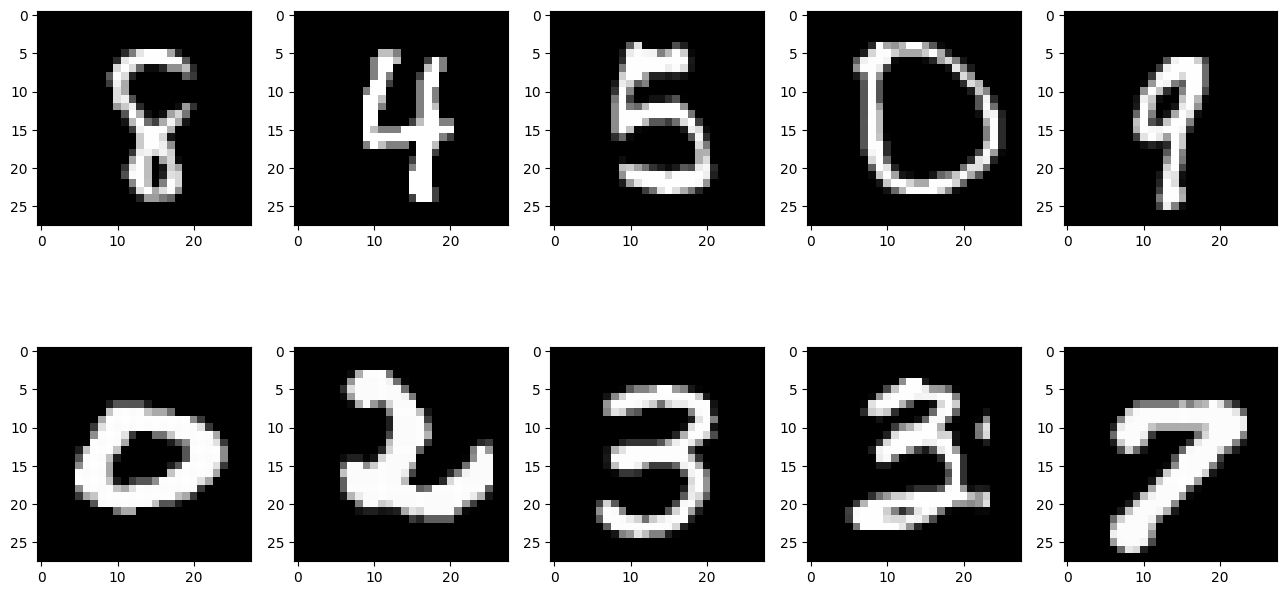

In [387]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [388]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [389]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='relu', kernel_regularizer=l1(0.0001)))
model.add(Dense(64,input_dim=64,activation='relu', kernel_regularizer=l2(0.0001)))
model.add(Dense(64,input_dim=64,activation='relu', kernel_regularizer=l1(0.0001)))
model.add(Dense(32,input_dim=64,activation='relu',  kernel_regularizer=l2(0.0001)))
model.add(Dense(10,input_dim=32,activation='softmax'))
optimizer = SGD(learning_rate=0.002, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=optimizer ,metrics=['accuracy'])

In [390]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_38 (Flatten)        (None, 784)               0         
                                                                 
 dense_175 (Dense)           (None, 128)               100480    
                                                                 
 dense_176 (Dense)           (None, 64)                8256      
                                                                 
 dense_177 (Dense)           (None, 64)                4160      
                                                                 
 dense_178 (Dense)           (None, 32)                2080      
                                                                 
 dense_179 (Dense)           (None, 10)                330       
                                                                 
Total params: 115,306
Trainable params: 115,306
Non-t

Train the model

In [391]:
train_info = model.fit(new_train_data , new_train_target , epochs = 15)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0536 - accuracy: 0.8204
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6284 - accuracy: 0.9385
Epoch 3/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5399 - accuracy: 0.9554
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4793 - accuracy: 0.9645
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4323 - accuracy: 0.9702
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3916 - accuracy: 0.9749
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3567 - accuracy: 0.9782
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3262 - accuracy: 0.9806
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3017 - accuracy: 0.9814
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.275

Plot the loss and accuracy graphs

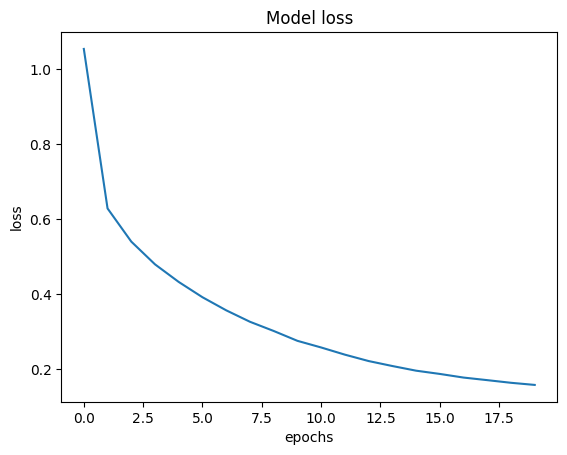

In [392]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

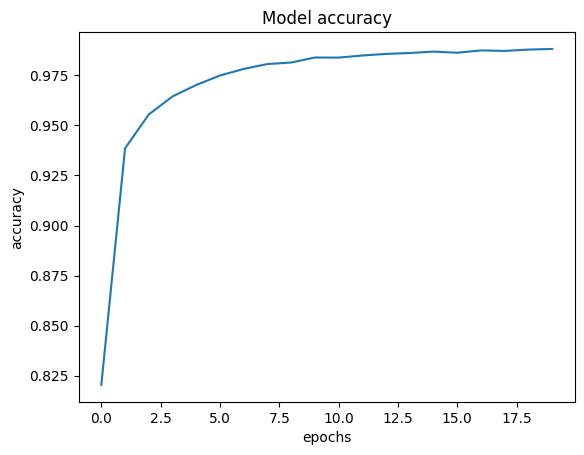

In [393]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [394]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 0s 1ms/step - loss: 0.1957 - accuracy: 0.9773
Loss of the Test dataset is: 0.1956510692834854
Accuracy of the test dataset is: 0.9772999882698059


Save the model weights

In [395]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

313/313 [==============================] - 0s 1ms/step - loss: 0.1957 - accuracy: 0.9773
Loss of the Test dataset is: 0.1956510692834854
Accuracy of the test dataset is: 0.9772999882698059
313/313 [==============================] - 0s 1ms/step


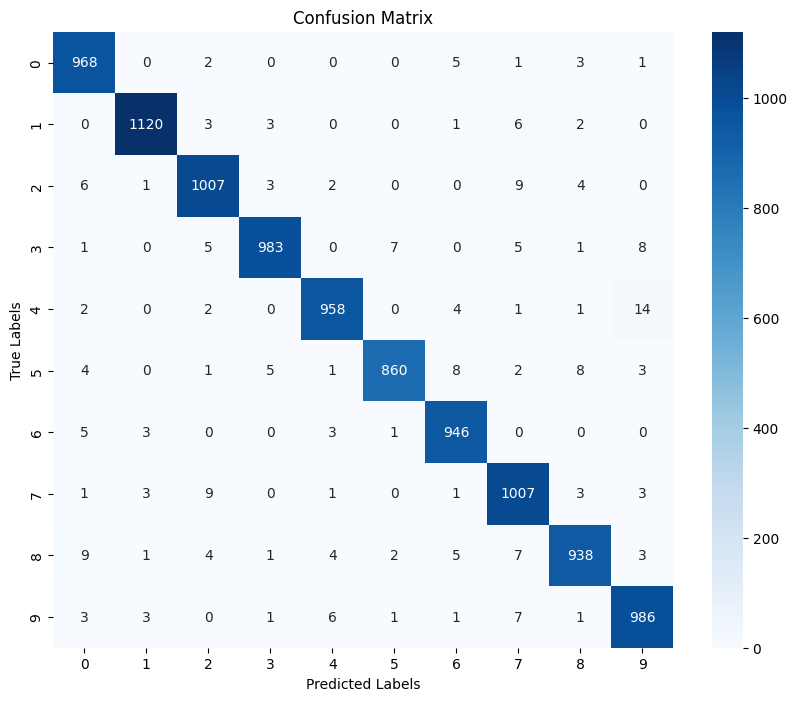

In [396]:
loss, acc = model.evaluate(new_test_data, new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

predictions = model.predict(new_test_data)
predicted_labels = np.argmax(predictions, axis=1)


conf_matrix = confusion_matrix(test_target, predicted_labels)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()